In [1]:
import sys
!{sys.executable} -m pip install --upgrade --user pip
!{sys.executable} -m pip install -U numpy pandas uproot3 matplotlib --user

In [2]:
import pandas as pd
import uproot3
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sympy
import cirq

%matplotlib inline
from cirq.contrib.svg import SVGCircuit

C:\Users\Furka\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
training_data = pd.read_csv("D:\llll.csv")
training_data

,entry,lep_pt_0,lep_pt_1,lep_pt_2,lep_pt_3,lep_eta_0,lep_eta_1,lep_eta_2,lep_eta_3,lep_phi_0,...,lep_ptconerel_3,lep_etconerel_0,lep_etconerel_1,lep_etconerel_2,lep_etconerel_3,min_mll,mZ1,mZ2,mllll,totalWeight
0,0,64.853691,61.677957,48.666441,44.360594,1.511926,0.952760,1.190816,2.102812,1.960999,...,0.029999,-0.005584,-0.002022,-0.007211,0.011298,91.840621,106.980557,91.840621,229.654277,0.000353
1,1,55.921848,41.498750,18.562252,11.200327,-1.558990,-0.719307,-1.822029,-2.090571,1.956400,...,1.407609,-0.006237,0.012523,0.112979,0.031323,4.202465,90.328529,4.202465,132.688869,0.000086
2,2,84.155969,78.250461,56.973090,56.136598,-0.204045,0.391090,0.457037,-0.584274,-0.723562,...,0.000000,-0.008451,0.003575,0.042670,-0.002353,92.441531,116.196530,92.441531,296.506040,0.001950
3,3,100.780219,26.851668,13.466778,11.434911,0.627362,-0.930592,0.041212,-0.072470,1.774672,...,0.000000,0.033255,0.088487,0.102767,0.009228,4.883220,91.068355,4.883220,101.265195,0.001335
4,4,172.537703,98.566398,74.528453,12.576789,0.589324,-1.312705,-1.988918,1.215276,1.250310,...,0.000000,0.004265,0.004279,0.027250,0.002394,82.989624,374.727122,147.308682,623.674832,0.000177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554274,554274,147.117969,36.520570,22.780432,19.437691,-1.918024,-0.404932,-0.854412,0.354967,1.612541,...,0.000000,0.008105,-0.024077,0.035397,0.001210,55.844045,97.231415,44.696088,284.044776,-0.001044
554275,554275,48.948672,48.862410,39.796707,31.510016,0.872254,-0.570310,0.249776,-1.737656,1.063468,...,0.000000,0.027352,0.022976,0.034499,-0.010535,92.093666,92.152809,92.093666,251.805631,0.000262
554276,554276,119.936562,102.871875,54.995215,20.621857,-2.102342,-1.269684,-2.014429,-1.842380,0.820614,...,0.000000,0.004532,-0.004599,0.005827,-0.005713,30.535058,239.135368,30.535058,317.328837,0.002001
554277,554277,32.009953,31.902018,20.184078,14.703700,0.423795,-0.919044,1.639777,0.755105,-1.280522,...,0.000000,0.007789,0.016551,-0.021334,0.101311,15.793846,90.045157,15.793846,148.304865,0.002193


In [4]:
#Assuming 'df' is your DataFrame
training_data = training_data.iloc[:30000]
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   entry            30000 non-null  int64  
 1   lep_pt_0         30000 non-null  float64
 2   lep_pt_1         30000 non-null  float64
 3   lep_pt_2         30000 non-null  float64
 4   lep_pt_3         30000 non-null  float64
 5   lep_eta_0        30000 non-null  float64
 6   lep_eta_1        30000 non-null  float64
 7   lep_eta_2        30000 non-null  float64
 8   lep_eta_3        30000 non-null  float64
 9   lep_phi_0        30000 non-null  float64
 10  lep_phi_1        30000 non-null  float64
 11  lep_phi_2        30000 non-null  float64
 12  lep_phi_3        30000 non-null  float64
 13  lep_E_0          30000 non-null  float64
 14  lep_E_1          30000 non-null  float64
 15  lep_E_2          30000 non-null  float64
 16  lep_E_3          30000 non-null  float64
 17  lep_charge_0

training_data = pd.read_csv("D:\data.csv")
training_data

C:\Users\Furka\AppData\Local\Temp\ipykernel_4348\2509863394.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  circuit += cirq.Circuit(cirq.rx(data[i])(q) for i, q in enumerate(qubits))


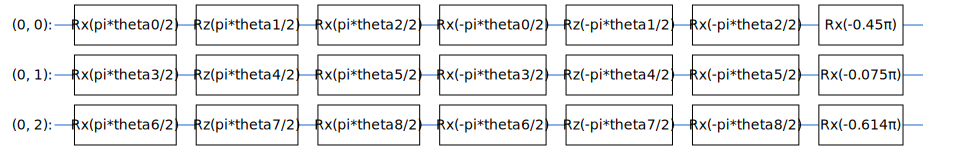

In [5]:
# Assuming that the last column is the target (y) and the rest are features (x)
#df.drop(columns=df.columns[0], inplace=True)
X = training_data.drop('entry',axis=1)
y = training_data['mllll']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def one_qubit_rotation(qubit, symbols):

    return [cirq.rx(symbols[0])(qubit),
            cirq.rz(symbols[1])(qubit),
            cirq.rx(symbols[2])(qubit),
            cirq.rx(symbols[0])(qubit)**-1,
            cirq.rz(symbols[1])(qubit)**-1,
            cirq.rx(symbols[2])(qubit)**-1]

def generate_circuit(qubits, n_layers, data):
    """
    Prepares a data re-uploading circuit on `qubits` with `n_layers` layers.
    """
    # Number of qubits
    n_qubits = len(qubits)

    # Sympy symbols for variational angles
    params = sympy.symbols(f'theta(0:{3*(n_layers+1)*n_qubits})')
    params = np.asarray(params).reshape((n_layers + 1, n_qubits, 3))

    # Scale parameters to be between -pi/2 and pi/2
    params = params * sympy.pi / 2



    # Define circuit
    circuit = cirq.Circuit()
    for l in range(n_layers):
        # Variational layer
        circuit += cirq.Circuit(one_qubit_rotation(q, params[l, i]) for i, q in enumerate(qubits))
        # Encoding layer
        circuit += cirq.Circuit(cirq.rx(data[i])(q) for i, q in enumerate(qubits))

    # Last varitional layer
    #circuit += cirq.Circuit(one_qubit_rotation(q, params[n_layers, i]) for i,q in enumerate(qubits))

    return circuit, list(params.flat)

def generate_data(circuit, n_samples):
    """Draw n_samples samples from circuit into a tf.Tensor."""
    return tf.squeeze(tfq.layers.Sample()(circuit, repetitions=n_samples).to_tensor())

# Use the first sample from the training set to create the circuit
n_qubits, n_layers = 3, 1
qubits = cirq.GridQubit.rect(1, n_qubits)
sample = X_train.iloc[0]
circuit, _ = generate_circuit(qubits, n_layers, sample)
SVGCircuit(circuit)



def linear_kernel(X_i, X_j):
  """
  Custom linear kernel using vectorized dot product with NumPy.

  Args:
      X_i: A NumPy array representing the first data point.
      X_j: A NumPy array representing the second data point.

  Returns:
      The dot product of X_i and X_j.
  """
  return np.dot(X_i, X_j.T)

In [6]:
from sklearn.svm import SVR

# Define your custom kernel function
# This should be a function that takes two arguments: two matrices of shape (n_samples1, n_features), and (n_samples2, n_features)
# It should return a Gram matrix: a matrix of shape (n_samples1, n_samples2)
def my_kernel(X, y):
    return np.dot(X, y.T)

# Create your SVR model with your custom kernel
model = SVR(kernel=my_kernel)

# Fit your model (replace X_train and y_train with your data)
model.fit(X_train, y_train)


SVR(kernel=<function my_kernel at 0x000002696C565A80>)

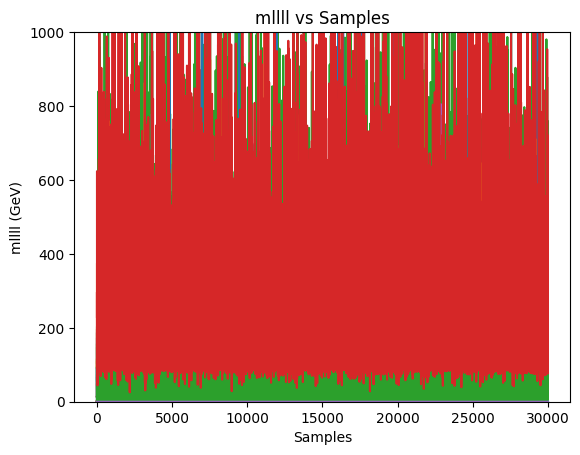

In [7]:

plt.plot(X)
plt.ylim(0, 1000)
plt.title('mllll vs Samples')
plt.xlabel('Samples')
plt.ylabel('mllll (GeV)')
plt.show()

Quantumattempt = clf1.fit(X,y)
SVMquantum_pred = Quantumattempt.predict(test_data)
SVMquantum_pred 